<a href="https://colab.research.google.com/github/tombraganca/Inteligente-Artificial/blob/main/Fuzzy_Temperatura_e_Umidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

  Using cached scikit_fuzzy-0.4.2-py3-none-any.whl


In [2]:
# [2] Fuzzificação
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# Criando as variáveis do problema
temperatura = ctrl.Antecedent(np.arange(0,41,1),'temperatura')
umidade = ctrl.Antecedent(np.arange(0,101,1),'umidade')
validade = ctrl.Consequent(np.arange(0,61,1),'validade')

In [4]:
# Criando as funções de pertinência para a temperatura
temperatura['fria']= fuzz.trapmf(temperatura.universe,[0,0,10,22])
temperatura['amena']= fuzz.gaussmf(temperatura.universe,22,5)
temperatura['quente']= fuzz.trapmf(temperatura.universe,[25,30,40,40])

In [5]:
# Criando as funções de pertinência para a umidade
umidade['baixa']= fuzz.trapmf(umidade.universe,[0,0,20,60])
umidade['média']= fuzz.trapmf(umidade.universe,[0,50,60,100])
umidade['alta']= fuzz.trimf(umidade.universe,[60,100,100])

In [6]:
# Criando as funções de pertinência para validade
validade['curta']= fuzz.trapmf(validade.universe,[0,0,5,30])
validade['aceitável']= fuzz.trimf(validade.universe,[10,30,50])
validade['longa']= fuzz.trapmf(validade.universe,[30,50,60,60])

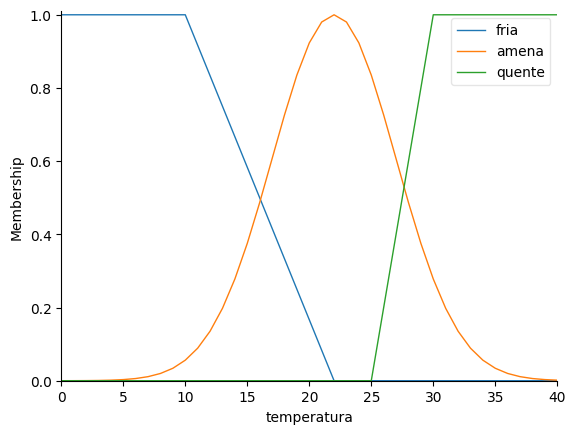

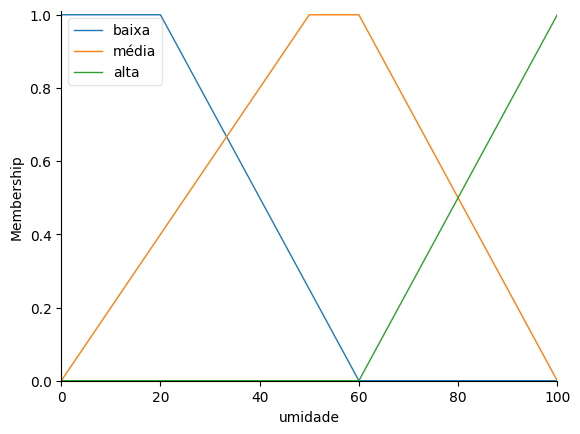

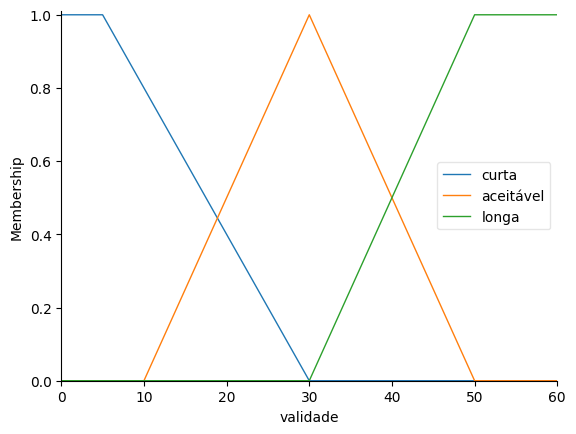

In [7]:
# Visualizando as funções de pertinência para cada variável
temperatura.view()
umidade.view()
validade.view()

In [8]:
# [3] Inferência Fuzzy e Defuzzificação

# Base de Conhecimento/Regras
rule1 = ctrl.Rule(temperatura['fria'] & umidade['baixa'],validade['longa'])
rule2 = ctrl.Rule(temperatura['quente'] | umidade['alta'],validade['curta'])
rule3 = ctrl.Rule(umidade['média'],validade['aceitável'])

In [9]:
# Sistema Fuzzy e Simulação
validade_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
validade_simulador = ctrl.ControlSystemSimulation(validade_ctrl)

In [10]:
# Entranda da temperatura
while True:
   temp = float(input('Digite a T (ºC): '))
   if (temp<0 or temp >40):
      print('A temperatura deve estar no intervalo [0, 40]')
      continue
   validade_simulador.input['temperatura'] = temp
   break

Digite a T (ºC): 40


In [11]:
# Entrada da umidade relativa
while True:
    ur = float(input('Digite a UR (%): '))
    if (ur<0 or temp > 100):
       print('A umidade deve estar no intervalo [0, 100]')
       continue
    validade_simulador.input['umidade'] = ur
    break

Digite a UR (%): 25


In [12]:
# Computando o resultado (Inferência Fuzzy + Defuzzificação)
validade_simulador.compute()
print('A validade é de %d dias' % round(validade_simulador.output['validade']))


A validade é de 19 dias


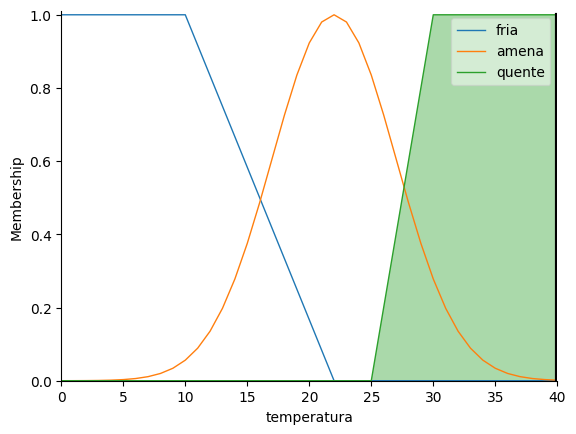

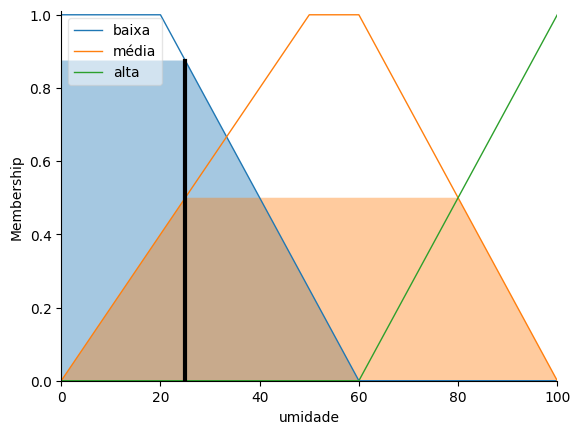

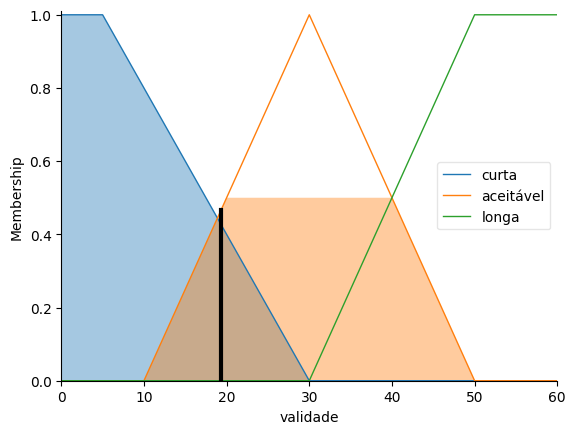

In [13]:
# Visualizando as regiões
temperatura.view(sim=validade_simulador)
umidade.view(sim=validade_simulador)
validade.view(sim=validade_simulador)